In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [15]:
# read a CSV into a dataframe (adjust filename as needed)
events_filename = './data/event.csv'  # or provide a full path

if not os.path.exists(events_filename):
    csv_files = [f for f in os.listdir('.') if f.lower().endswith('.csv')]
    if not csv_files:
        raise FileNotFoundError(f"{events_filename!r} not found and no CSV files in the current directory.")
    filename = csv_files[0]
    print(f"No file named 'data.csv' found. Using first CSV in cwd: {filename}")

events = pd.read_csv(events_filename)
print(f"Loaded {len(events)} rows and {len(events.columns)} columns from {events_filename}")
events.head()

Loaded 107738 rows and 14 columns from ./data/event.csv


/var/folders/_b/sl_t4k5539781f29qf723b080000gn/T/ipykernel_51491/2221732598.py:11: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  events = pd.read_csv(events_filename)


,type,inPlay,isStrike,isBall,pitcherName,catcherName,batterName,pitchCode,pitchType,velocity,coordX,coordY,runners,PAId
0,PITCH,False,False,True,徐若熙,蔣少宏,陳晨威,B,FF,145,71.11,-91.43,[],NaN
1,PITCH,True,True,False,徐若熙,蔣少宏,陳晨威,H,FF,147,54.86,42.67,"[{'type': 'PA', 'runnerName': '陳晨威', 'isOut': ...",NaN
2,PITCH,False,True,False,徐若熙,蔣少宏,林立,F,FF,145,54.86,22.35,[],NaN
3,PITCH,False,True,False,徐若熙,蔣少宏,林立,SW,SL,135,-2.03,-56.89,[],NaN
4,PITCH,False,False,True,徐若熙,蔣少宏,林立,B,SL,139,-34.54,-144.25,[],NaN


In [16]:
# read a CSV into a dataframe (adjust filename as needed)
pa_filename = './data/pa.csv'  # or provide a full path

if not os.path.exists(pa_filename):
    csv_files = [f for f in os.listdir('.') if f.lower().endswith('.csv')]
    if not csv_files:
        raise FileNotFoundError(f"{pa_filename!r} not found and no CSV files in the current directory.")
    filename = csv_files[0]
    print(f"No file named 'data.csv' found. Using first CSV in cwd: {filename}")



pas = pd.read_csv(pa_filename, usecols=['inning', 'batterName', 'batterHand', 'pitcherName', 'pitcherHand', 'catcherName', 'paRound', 'pitchCodes', 'result', 'hardness', 'bases'])
print(f"Loaded {len(pas)} rows and {len(pas.columns)} columns from {pa_filename}")
pas.head()


Loaded 27600 rows and 11 columns from ./data/pa.csv


,inning,batterName,batterHand,pitcherName,pitcherHand,catcherName,paRound,bases,pitchCodes,result,hardness
0,1,陳晨威,L,徐若熙,R,蔣少宏,1,0,"['B', 'H']",GO,M
1,1,林立,R,徐若熙,R,蔣少宏,1,0,"['F', 'SW', 'B', 'B', 'S']",SO,NaN
2,1,梁家榮,L,徐若熙,R,蔣少宏,1,0,"['S', 'F', 'B', 'H']",2B,H
3,1,廖健富,L,徐若熙,R,蔣少宏,1,2,"['B', 'H']",1B,H
4,2,朱育賢,L,徐若熙,R,蔣少宏,1,0,"['S', 'SW', 'H']",FO,M


In [17]:
# pas = pas[~pas['result'].isna()]

## filter pitchers and batters with number of pa

In [18]:
batter_names = pas['batterName'].unique()
print(f"Found {len(batter_names)} unique batters")

Found 173 unique batters


In [ ]:
batter_names_filtered = []  
for batter in batter_names:
    pas_batter = pas[pas['batterName'] == batter]
    if len(pas_batter) < 50:
        continue
    batter_names_filtered.append(batter)

print(len(batter_names_filtered))

113


In [20]:
pitcher_names = pas['pitcherName'].unique()
print(f"Found {len(pitcher_names)} unique pitchers")

Found 168 unique pitchers


In [21]:
pitcher_names_filtered = []
for pitcher in pitcher_names:
    pas_pitcher = pas[pas['pitcherName'] == pitcher]
    if len(pas_pitcher) < 50:
        continue
    pitcher_names_filtered.append(pitcher)

print(len(pitcher_names_filtered))

124


In [22]:
pa_filtered = pas[pas['batterName'].isin(batter_names_filtered) & pas['pitcherName'].isin(pitcher_names_filtered) ]
print(f"Filtered PA count: {len(pa_filtered)}")

events_filtered = events[events['batterName'].isin(batter_names_filtered) & events['pitcherName'].isin(pitcher_names_filtered) ]
print(f"Filtered Event count: {len(events_filtered)}")

Filtered PA count: 26009
Filtered Event count: 101244


## filter only no-runner-on-base situation

In [23]:
pa_filtered = pa_filtered[pa_filtered['bases'] == 0]
pa_filtered = pa_filtered[pa_filtered['inning'] < 10] # exclude extra innings where strategies differ and extra pa in data
print(f"Filtered PA count (no runner on base): {len(pa_filtered)}")

Filtered PA count (no runner on base): 13425


In [24]:
_unusual_results = ['IH', 'HBP', 'IBB']
pa_filtered = pa_filtered[~pa_filtered['result'].isin(_unusual_results)]
print(f"Filtered PA count (removed unusual results): {len(pa_filtered)}")

Filtered PA count (removed unusual results): 13263


In [25]:
results_name = pa_filtered['result'].unique()
print(results_name)

['GO' 'SO' '2B' 'FO' 'E' 'uBB' '1B' 'HR' '3B' 'H']


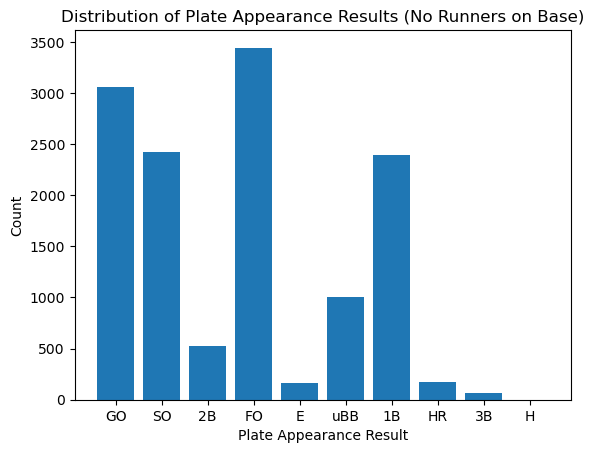

In [26]:
plt.bar(results_name, [len(pa_filtered[pa_filtered['result'] == r]) for r in results_name])
plt.xlabel('Plate Appearance Result')
plt.ylabel('Count')
plt.title('Distribution of Plate Appearance Results (No Runners on Base)')
plt.show()